In [1]:
!git clone https://github.com/Mykrass/Viz-function-for-jinni-test.git

Cloning into 'Viz-function-for-jinni-test'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 174 (delta 30), reused 0 (delta 0), pack-reused 111
Receiving objects: 100% (174/174), 2.08 MiB | 7.03 MiB/s, done.
Resolving deltas: 100% (97/97), done.


In [2]:
!ls -GFlash --color ./Viz-function-for-jinni-test/

total 3.9M
4.0K drwxr-xr-x 3 root 4.0K Feb  3 16:23  ./
4.0K drwxr-xr-x 1 root 4.0K Feb  3 16:23  ../
3.4M -rw-r--r-- 1 root 3.4M Feb  3 16:23  010922_test_jinni.ipynb
528K -rw-r--r-- 1 root 525K Feb  3 16:23 '050922_Jinni_Anomaly_Detection_Toolkit_(ADTK).ipynb'
4.0K -rw-r--r-- 1 root  632 Feb  3 16:23  creating_table_jinni_script.sql
 12K -rw-r--r-- 1 root  11K Feb  3 16:23  customer_function.py
4.0K drwxr-xr-x 8 root 4.0K Feb  3 16:23  .git/
4.0K -rw-r--r-- 1 root 1.8K Feb  3 16:23  .gitignore
4.0K -rw-r--r-- 1 root   78 Feb  3 16:23  README.md
4.0K -rw-r--r-- 1 root  988 Feb  3 16:23  test_question_1.sql
4.0K -rw-r--r-- 1 root  621 Feb  3 16:23  test_question_2.sql


In [3]:
!cat ./Viz-function-for-jinni-test/customer_function.py

#
import os
import sys
import missingno as mno
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm, skew #for some statistics

# Plots
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# data quality   
def data_quality(df, column):  #convert_dtypes_with_reduce_memory(df)
    # datetime
    df[column] = pd.to_datetime(df[column], utc=True, infer_datetime_format=True)
    # any duplicate time periods?
    print("count of duplicates:",df.duplicated(subset=[column], keep="first").sum())
    # any non-numeric types?
    print("non-numeric columns:",list(df.dtypes[df.dtypes == "object"].index))
    
    
    
# any missing values?
def printing_missing_values(df):
    if df.isnull().values.any():
        print("MISSING values:\n")
        mno.matrix(df)
    else:
        print("no missing values\n")
    
    
    
# drop th

In [4]:
!wget https://www.dropbox.com/s/uaazpg066li0gez/test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv

--2023-02-03 16:23:35--  https://www.dropbox.com/s/uaazpg066li0gez/test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/uaazpg066li0gez/test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv [following]
--2023-02-03 16:23:36--  https://www.dropbox.com/s/raw/uaazpg066li0gez/test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc306bae6bc1c3979563f70185d9.dl.dropboxusercontent.com/cd/0/inline/B1ykEbsoQlRFMw_XjhhcUq5ULPDiuUgWdlaHl12PE4RzGS0RkHhaIcpA4edhHVDQD4Bc410xwdoZU27lioqGq2vKPUw6L-ItomaDlx7tcMXmeeMqDiavqBu1R7mLdheY43vLPe2FhYbFjuxfO3R3e4hHSWHDPlQLqKgtgTlJR5ZAYw/file# [following

In [5]:
!head 'test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv'

candidate_id,hire_reported,primary_keyword_candidate,candidates_city,candidates_country,experience_years,en_level_candidate,hire_salary,company_type
67101,2020-01-08T18:54:32+02:00,Lead,Киев,Ukraine,11.0,upper,3500,outsource/outstaff
232534,2020-02-07T17:45:39+02:00,JavaScript,Киев,Ukraine,8.0,upper,6000,product
201076,2020-01-19T13:44:39+02:00,iOS,Запорожье,Ukraine,0.5,intermediate,800,
217961,2020-02-19T01:56:20+02:00,Design,Киев,Ukraine,3.0,intermediate,800,other
233372,2020-02-11T15:53:41+02:00,Design,,Ukraine,6.0,fluent,2000,product
165954,2020-01-30T17:55:13+02:00,QA Automation,Киев,Ukraine,2.0,upper,2500,outsource/outstaff
21041,2020-02-11T15:50:13+02:00,SQL,Киев,Ukraine,6.0,upper,2000,outsource/outstaff
229922,2020-02-11T15:23:16+02:00,PHP,Киев,Ukraine,10.0,intermediate,3500,outsource/outstaff
19626,2020-01-16T11:49:40+02:00,JavaScript,Львов,Ukraine,11.0,fluent,3000,


In [6]:
from pathlib import Path
#path=Path('./adtk/docs/notebooks/data/quickstart/')
path=Path('.')
path

PosixPath('.')

In [7]:
import pandas as pd
df = pd.read_csv(path/"test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv", index_col="hire_reported", parse_dates=True, squeeze=True)
df.index = pd.to_datetime(df.index, utc=True, infer_datetime_format=True)
df.sort_index(inplace=True)
df.reset_index(inplace=True)
df

,hire_reported,candidate_id,primary_keyword_candidate,candidates_city,candidates_country,experience_years,en_level_candidate,hire_salary,company_type
0,2020-01-01 10:13:25+00:00,161883,Golang,Киев,Ukraine,1.0,pre,500,product
1,2020-01-02 05:31:26+00:00,131089,QA,NaN,Ukraine,6.0,intermediate,1400,outsource/outstaff
2,2020-01-02 09:31:06+00:00,191901,JavaScript,Одесса,Ukraine,3.0,pre,600,NaN
3,2020-01-02 10:40:18+00:00,88015,QA Automation,Киев,Ukraine,4.0,intermediate,3000,product
4,2020-01-02 10:42:43+00:00,137789,Node.js,Киев,Ukraine,2.0,intermediate,1700,outsource/outstaff
...,...,...,...,...,...,...,...,...,...
7946,2020-12-30 14:42:11.307461+00:00,142652,NaN,NaN,Ukraine,11.0,NaN,0,outsource/outstaff
7947,2020-12-30 15:12:41+00:00,282194,JavaScript,Львов,Ukraine,6.0,intermediate,1900,NaN
7948,2020-12-30 15:36:29.968230+00:00,246108,Marketing,Львов,Ukraine,4.0,upper,1200,NaN
7949,2020-12-30 16:56:12.519645+00:00,318470,.NET,NaN,Ukraine,9.0,upper,3600,outsource/outstaff


count of duplicates: 5
non-numeric columns: ['primary_keyword_candidate', 'candidates_city', 'candidates_country', 'en_level_candidate', 'company_type']
MISSING values:



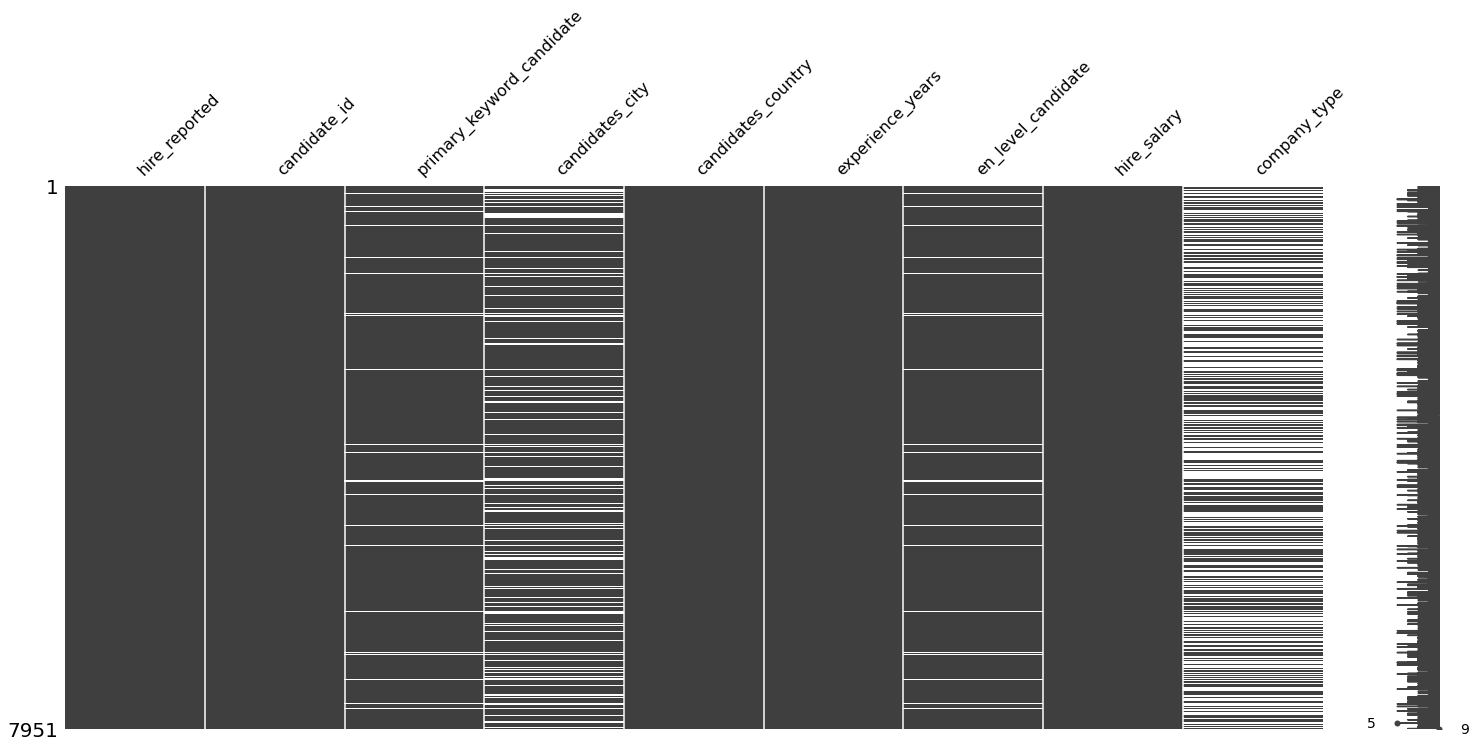

In [8]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mno

from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm, skew #for some statistics

#
sys.path.append('/content/Viz-function-for-jinni-test')
import customer_function

# Using customer_function from git repository
customer_function.data_quality(df, 'hire_reported')
customer_function.printing_missing_values(df)

In [20]:
staticmethod.__doc__

'staticmethod(function) -> method\n\nConvert a function to be a static method.\n\nA static method does not receive an implicit first argument.\nTo declare a static method, use this idiom:\n\n     class C:\n         @staticmethod\n         def f(arg1, arg2, ...):\n             ...\n\nIt can be called either on the class (e.g. C.f()) or on an instance\n(e.g. C().f()). Both the class and the instance are ignored, and\nneither is passed implicitly as the first argument to the method.\n\nStatic methods in Python are similar to those found in Java or C++.\nFor a more advanced concept, see the classmethod builtin.'

In [9]:
#
import os
import sys
import missingno as mno
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm, skew #for some statistics

# Plots
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#VIZ Statistics
class VIZ:
        # data quality
        @staticmethod   
        def data_quality(df, column):  #convert_dtypes_with_reduce_memory(df)
            # datetime
            df[column] = pd.to_datetime(df[column], utc=True, infer_datetime_format=True)
            # any duplicate time periods?
            print("count of duplicates:",df.duplicated(subset=[column], keep="first").sum())
            # any non-numeric types?
            print("non-numeric columns:",list(df.dtypes[df.dtypes == "object"].index))
            
            
            
        # any missing values?
        @staticmethod
        def printing_missing_values(df):
            if df.isnull().values.any():
                print("MISSING values:\n")
                mno.matrix(df)
            else:
                print("no missing values\n")
            
            
            
        # drop the NaN and zero columns, and also the 'forecast' columns
        @staticmethod
        def data_cleaning(df):    
            df = df.drop(df.filter(regex="forecast").columns, axis=1, errors="ignore")
            df.dropna(axis=1, how="all", inplace=True)
            df = df.loc[:, (df!=0).any(axis=0)]  
            # handle missing values in rows of remaining columns
            df = df.interpolate(method ="bfill")
            if df.isnull().values.any():
                print("MISSING values:\n")
                mno.matrix(df)
            else:
                print("no missing values\n")



        # cleaning names for column
        @staticmethod
        def data_cleaning_with_vocabulary(df, en_level_candidate): # clearing 'en_level_candidate':  'no_english' and 'no english'
            df.dropna(axis=0, inplace=True) # my code for deleting last raw
            dict_days = {'upper':'upper', 'intermediate':'intermediate', 'fluent':'fluent','pre':'pre', 'basic':'basic', 'no_english':'no english'}
            df[en_level_candidate] = df[en_level_candidate].apply(lambda x: dict_days[x])
            print('Unique values:', df[en_level_candidate].unique())

                
                
        # add time futures
        @staticmethod
        def add_time_futures(df, column):  
            # datetime
            df[column] = pd.to_datetime(df[column], utc=True, infer_datetime_format=True)
            df.set_index(column, inplace=True)
            df.sort_index(inplace=True)
            df["month"] = df.index.month
            df["wday"] = df.index.dayofweek
            dict_days = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
            df["weekday"] = df["wday"].apply(lambda x: dict_days[x])
            df["hour"] = df.index.hour
            df = df.astype({"hour":float, "wday":float, "month": float})
            print("earliest time period:", df.index.min())
            print("latest time period:", df.index.max())
            

            
        # convert int and float64 columns to float32
        @staticmethod
        def convert_dtypes_with_reduce_memory(df): 
            intcols = list(df.dtypes[df.dtypes == np.int64].index)
            df[intcols] = df[intcols].applymap(np.float32)

            f64cols = list(df.dtypes[df.dtypes == np.float64].index)
            df[f64cols] = df[f64cols].applymap(np.float32)

            f32cols = list(df.dtypes[df.dtypes == np.float32].index)
            
            df.info()



        # boxplots
        @staticmethod
        def printing_boxplot(df):
            f32cols = list(df.dtypes[df.dtypes == np.float32].index)
            for i, c in enumerate(f32cols):
                sns.boxplot(x=df[c], palette="coolwarm")
                plt.show();  
                      
                

        # Printing parameters for Statistical distribution
        @staticmethod
        def printing_distribution_skewness_kurtosis(df, column):
            # Distribution
            sns.set_style("white")
            sns.set_color_codes(palette='deep')
            f, ax = plt.subplots(figsize=(12, 8))

            # Fit a normal distribution
            mu, std = norm.fit(df[column])

            # Frequency
            sns.distplot(df[column], color="b", fit = stats.norm)
            ax.xaxis.grid(False)
            ax.set(ylabel="Frequency")
            ax.set(xlabel=column)
            ax.set(title="%s distribution: mu = %.2f, std = %.2f" % (column, mu, std))
            sns.despine(trim=True, left=True)

            # Skewness and Kurtosis
            ax.text(x=1.1, y=1, transform=ax.transAxes, s="Skewness: %f" % df[column].skew(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='xkcd:poo brown')
            ax.text(x=1.1, y=0.95, transform=ax.transAxes, s="Kurtosis: %f" % df[column].kurt(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='xkcd:dried blood')

            plt.show()
            
            
            
        # pivot table: weekdays in months
        @staticmethod
        def printing_pivot_heatmap(df, values, index, columns): #printing_pivot_heatmap(df, "hire_salary", "month", "candidates_city")
            piv = pd.pivot_table(   df, 
                                    values= values, 
                                    index=index, 
                                    columns=columns, 
                                    aggfunc="mean", 
                                    margins=True, margins_name="Avg", 
                                    fill_value=0)
            pd.options.display.float_format = '{:,.0f}'.format

            plt.figure(figsize = (20, 10))
            sns.set(font_scale=1)
            sns.heatmap(piv.round(0), annot=True, square = True, \
                        linewidths=.75, cmap="coolwarm", fmt = ".0f", annot_kws = {"size": 11})
            plt.title("hire_salary by candidates_city by month")
            plt.show()
            
            

        # Creating cohort 
        @staticmethod   
        def create_cohort(df, start_date, end_date):
            cohort = df[(df.index >=start_date) & (df.index <= end_date)].copy()
            #cohort.reset_index(inplace=True, drop=True)
            return(cohort)



        # Helper functions for structured data
        ## Get info about the dataset
        @staticmethod
        def dataset_info(dataset, dataset_name: str):
            print(f"Dataset Name: {dataset_name} \
                | Number of Samples: {dataset.shape[0]} \
                | Number of Columns: {dataset.shape[1]}")
            print(30*"=")
            print("Column             Data Type")
            print(dataset.dtypes)
            print(30*"=")
            missing_data = dataset.isnull().sum()
            if sum(missing_data) > 0:
                print(missing_data[missing_data.values > 0])
            else:
                print("No Missing Data on this Dataset!")
            print(30*"=")
            print("Memory Usage: {} MB".\
                format(np.round(
                dataset.memory_usage(index=True).sum() / 10e5, 3
                )))
        ## Dataset Sampling
        @staticmethod
        def data_sampling(dataset, frac: float, random_seed: int):
            data_sampled_a = dataset.sample(frac=frac, random_state=random_seed)
            data_sampled_b =  dataset.drop(data_sampled_a.index).reset_index(drop=True)
            data_sampled_a.reset_index(drop=True, inplace=True)
            return data_sampled_a, data_sampled_b   
        ## Bar Plot
        @staticmethod
        def bar_plot(data, plot_title: str, x_axis: str, y_axis: str):
            colors = ["#0080ff",] * len(data)
            colors[0] = "#ff8000"
            trace = go.Bar(y=data.values, x=data.index, text=data.values, 
                            marker_color=colors)
            layout = go.Layout(autosize=False, height=600,
                            title={"text" : plot_title,
                              "y" : 0.9,
                              "x" : 0.5,
                              "xanchor" : "center",
                              "yanchor" : "top"},  
                            xaxis={"title" : x_axis},
                            yaxis={"title" : y_axis},)
            fig = go.Figure(data=trace, layout=layout)
            fig.update_layout(template="simple_white")
            fig.update_traces(textposition="outside",
                            textfont_size=14,
                            marker=dict(line=dict(color="#000000", width=2)))                
            fig.update_yaxes(automargin=True)
            iplot(fig)
        ## Plot Pie Chart
        @staticmethod
        def pie_plot(data, plot_title: str):
            trace = go.Pie(labels=data.index, values=data.values)
            layout = go.Layout(autosize=False,
                            title={"text" : plot_title,
                              "y" : 0.9,
                              "x" : 0.5,
                              "xanchor" : "center",
                              "yanchor" : "top"})
            fig = go.Figure(data=trace, layout=layout)
            fig.update_traces(textfont_size=14,
                            marker=dict(line=dict(color="#000000", width=2)))
            fig.update_yaxes(automargin=True)            
            iplot(fig)
        ## Histogram
        @staticmethod
        def histogram_plot(data, plot_title: str, y_axis: str):
            trace = go.Histogram(x=data)
            layout = go.Layout(autosize=False,
                            title={"text" : plot_title,
                              "y" : 0.9,
                              "x" : 0.5,
                              "xanchor" : "center",
                              "yanchor" : "top"},  
                            yaxis={"title" : y_axis})
            fig = go.Figure(data=trace, layout=layout)
            fig.update_traces(marker=dict(line=dict(color="#000000", width=2)))
            fig.update_layout(template="simple_white")
            fig.update_yaxes(automargin=True)
            iplot(fig)
        # Particular case: Histogram subplot (1, 2)
        @staticmethod
        def histogram_subplot(dataset_a, dataset_b, feature_a: str, feature_b: str, title: str, title_a: str, title_b: str):
            fig = make_subplots(rows=1, cols=2, subplot_titles=(
                                title_a,
                                title_b
                                )
                            )
            fig.add_trace(go.Histogram(x=dataset_a[feature_a],
                                      showlegend=False),
                                        row=1, col=1)
            fig.add_trace(go.Histogram(x=dataset_b[feature_b],
                                      showlegend=False),
                                      row=1, col=2)
            fig.update_layout(template="simple_white")
            fig.update_layout(autosize=False,
                                title={"text" : title,
                                "y" : 0.9,
                                "x" : 0.5,
                                "xanchor" : "center",
                                "yanchor" : "top"},  
                                yaxis={"title" : "<i>Frequency</i>"})
            fig.update_traces(marker=dict(line=dict(color="#000000", width=2)))
            fig.update_yaxes(automargin=True)
            iplot(fig)
        # Calculate scores with Test/Unseen labeled data
        @staticmethod
        def test_score_report(data_unseen, predict_unseen):
            le = LabelEncoder()
            data_unseen["Label"] = le.fit_transform(data_unseen.Churn.values)
            data_unseen["Label"] = data_unseen["Label"].astype(int)
            accuracy = accuracy_score(data_unseen["Label"], predict_unseen["Label"])
            roc_auc = roc_auc_score(data_unseen["Label"], predict_unseen["Label"])
            precision = precision_score(data_unseen["Label"], predict_unseen["Label"])
            recall = recall_score(data_unseen["Label"], predict_unseen["Label"])
            f1 = f1_score(data_unseen["Label"], predict_unseen["Label"])

            df_unseen = pd.DataFrame({
                "Accuracy" : [accuracy],
                "AUC" : [roc_auc],
                "Recall" : [recall],
                "Precision" : [precision],
                "F1 Score" : [f1]
            })
            return df_unseen

        # Confusion Matrix
        @staticmethod
        def conf_mat(data_unseen, predict_unseen):
            unique_label = data_unseen["Label"].unique()
            cmtx = pd.DataFrame(
                confusion_matrix(data_unseen["Label"],
                                predict_unseen["Label"],
                                labels=unique_label), 
                index=['{:}'.format(x) for x in unique_label], 
                columns=['{:}'.format(x) for x in unique_label]
            )
            ax = sns.heatmap(cmtx, annot=True, fmt="d", cmap="YlGnBu")
            ax.set_ylabel('Predicted')
            ax.set_xlabel('Target');
            ax.set_title("Predict Unseen Confusion Matrix", size=14);


count of duplicates: 5
non-numeric columns: ['primary_keyword_candidate', 'candidates_city', 'candidates_country', 'en_level_candidate', 'company_type']
MISSING values:



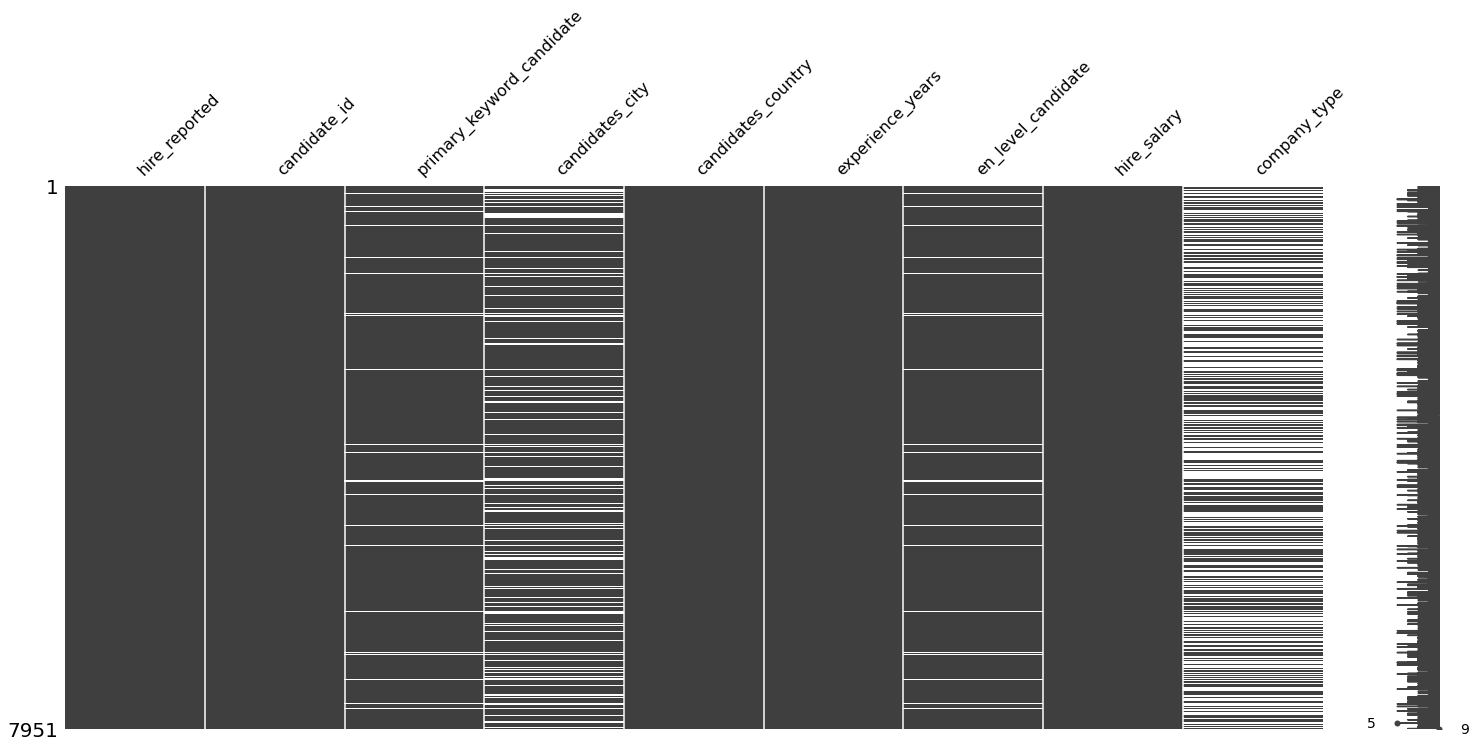

In [10]:
VIZ.data_quality(df, 'hire_reported')
VIZ.printing_missing_values(df)

In [11]:
# Using customer_function from git repository
VIZ.data_cleaning(df)

no missing values



In [12]:
# Using customer_function from git repository
VIZ.data_cleaning_with_vocabulary(df, 'en_level_candidate')

Unique values: ['pre' 'intermediate' 'fluent' 'upper' 'basic']


In [13]:
# Using customer_function from git repository
VIZ.add_time_futures(df, 'hire_reported')

# using custiomer function from git for convert int and float64 columns to float32
VIZ.convert_dtypes_with_reduce_memory(df)

earliest time period: 2020-01-01 10:13:25+00:00
latest time period: 2020-12-30 21:20:14.323059+00:00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3094 entries, 2020-01-01 10:13:25+00:00 to 2020-12-30 21:20:14.323059+00:00
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   candidate_id               3094 non-null   float32
 1   primary_keyword_candidate  3094 non-null   object 
 2   candidates_city            3094 non-null   object 
 3   candidates_country         3094 non-null   object 
 4   experience_years           3094 non-null   float32
 5   en_level_candidate         3094 non-null   object 
 6   hire_salary                3094 non-null   float32
 7   company_type               3094 non-null   object 
 8   month                      3094 non-null   float32
 9   wday                       3094 non-null   float32
 10  weekday                    3094 non-null   object 
 11  hour

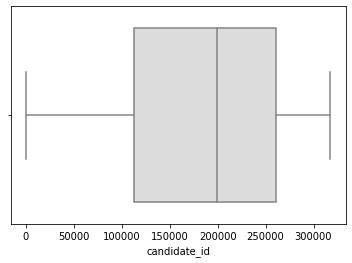

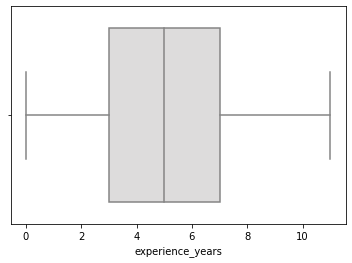

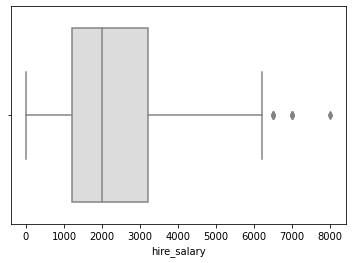

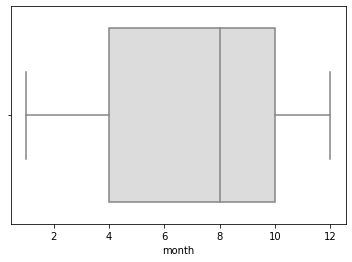

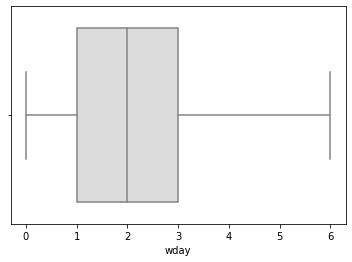

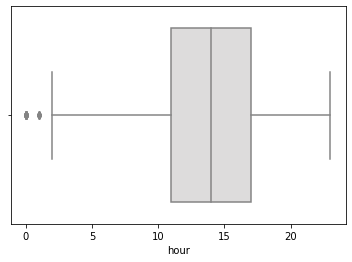

In [14]:
# Using customer_function from git repository
VIZ.printing_boxplot(df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



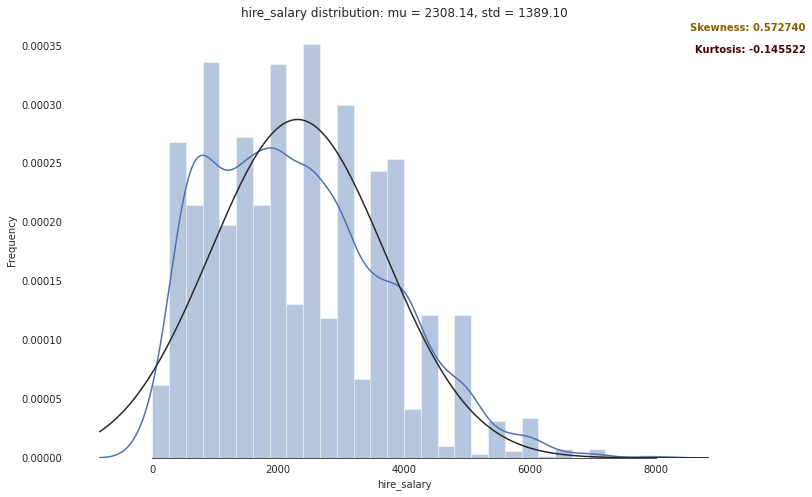

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



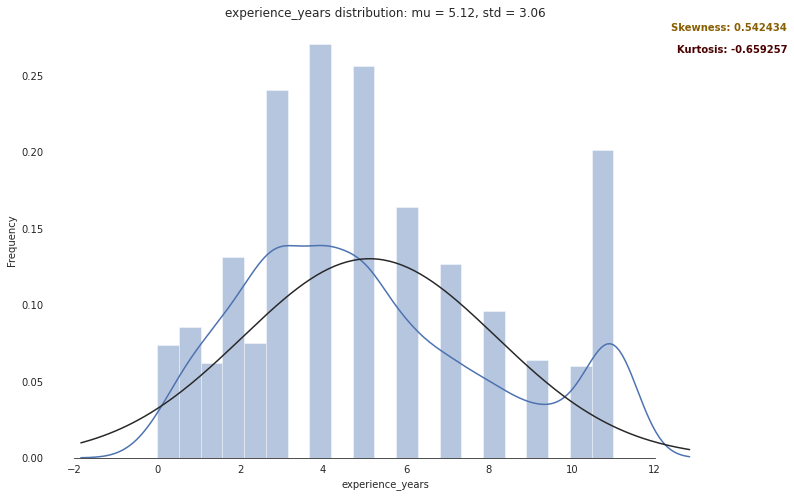

In [15]:
# Using customer_function from git repository
VIZ.printing_distribution_skewness_kurtosis(df, 'hire_salary')
# Using customer_function from git repository
VIZ.printing_distribution_skewness_kurtosis(df, 'experience_years')

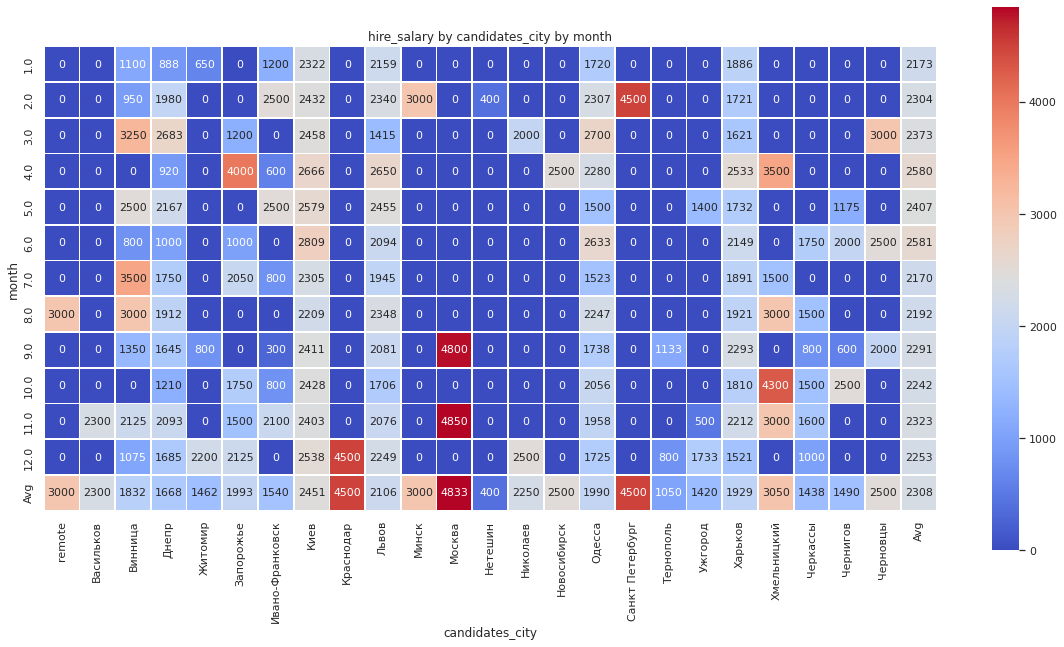

In [16]:
# using custiomer function from git
VIZ.printing_pivot_heatmap(df, "hire_salary", "month", "candidates_city")

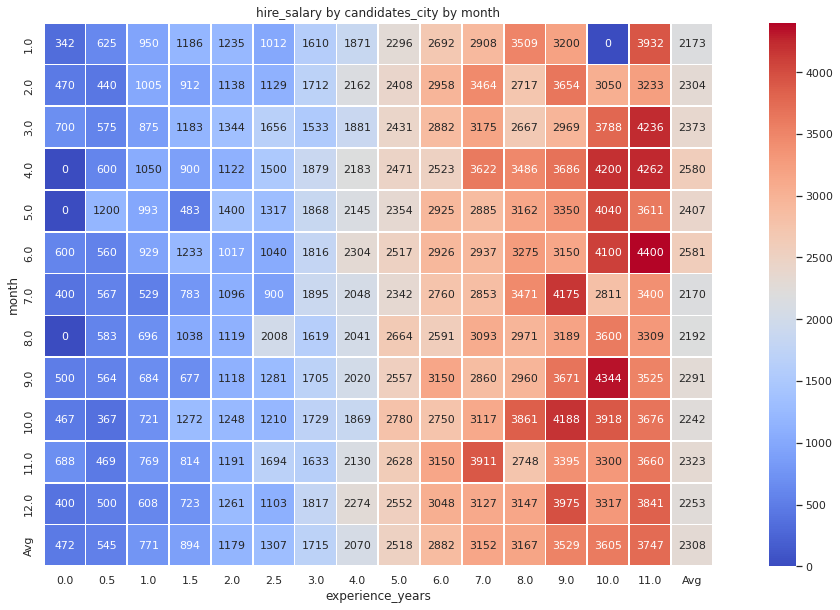

In [17]:
VIZ.printing_pivot_heatmap(df, "hire_salary", "month", "experience_years")

THE END